In [1]:
#Libraries

#Here all libraries required for current project are running in one go.

import pandas as pd #It provides ready to use high-performance data structures and data analysis tools

import numpy as np # It is used for working with arrays

import seaborn as sns #Visualize Distributions

import matplotlib.pyplot as plt #It is used to create 2D graphs and plots

import warnings
warnings.filterwarnings('ignore') #To ignore warnings

from sklearn import preprocessing #used for encoding

from sklearn.model_selection import train_test_split #to take train and test for model

from sklearn.linear_model import LinearRegression # for Linear Regression

from sklearn.metrics import mean_squared_error, mean_absolute_error

#### 1. Load the data :

    Read the “housing.csv” file from the folder into the program.
    Print first few rows of this data.
    Extract input (X) and output (Y) data from the dataset.

In [2]:
df = pd.read_excel('1553768847_housing.xlsx')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
df_x = df.drop('median_house_value', axis = 1) #independent variable/features

df_y = df['median_house_value']  #dependent variable/target


print(df_x, df_y)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income ocean_

In [6]:
df_x.info() #20640 rows and 9 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 1.4+ MB


In [7]:
df_y.info() #20640 rows and 1 column

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: median_house_value
Non-Null Count  Dtype
--------------  -----
20640 non-null  int64
dtypes: int64(1)
memory usage: 161.4 KB


longitude


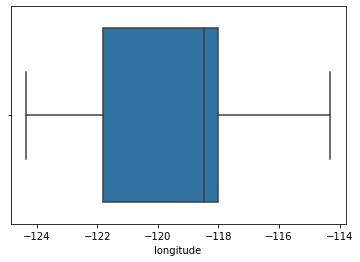

latitude


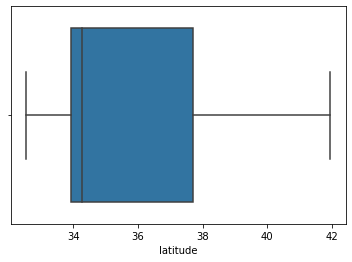

housing_median_age


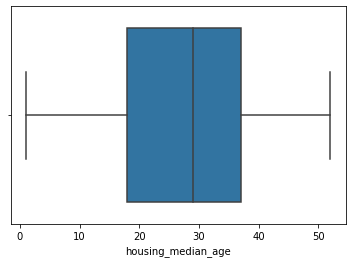

total_rooms


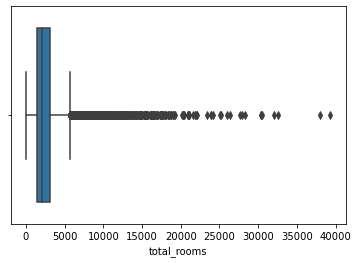

total_bedrooms


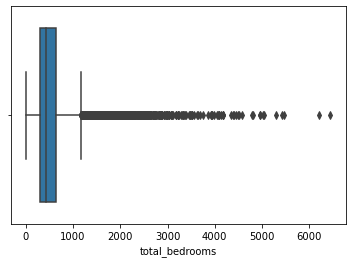

population


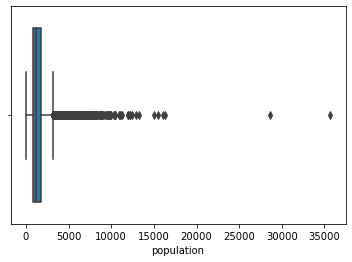

households


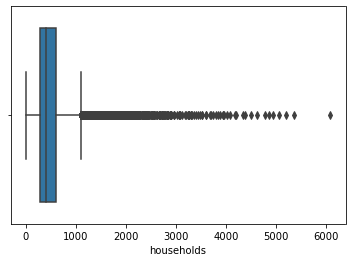

median_income


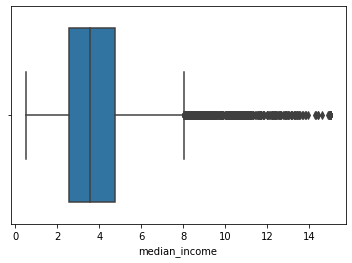

median_house_value


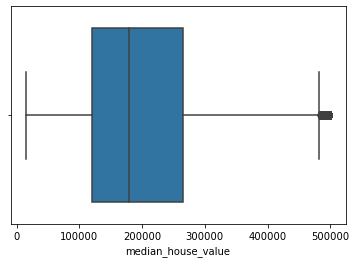

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0      880.000           129.0   
1        -122.22     37.86                21.0     5698.375          1106.0   
2        -122.24     37.85                52.0     1467.000           190.0   
3        -122.25     37.85                52.0     1274.000           235.0   
4        -122.25     37.85                52.0     1627.000           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0     1665.000           374.0   
20636    -121.21     39.49                18.0      697.000           150.0   
20637    -121.22     39.43                17.0     2254.000           485.0   
20638    -121.32     39.43                18.0     1860.000           409.0   
20639    -121.24     39.37                16.0     2785.000           616.0   

       population  households  median_income ocean_

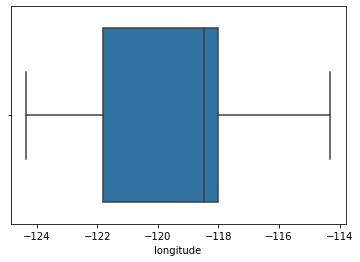

latitude


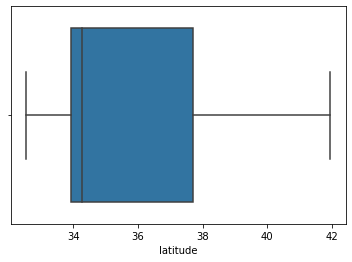

housing_median_age


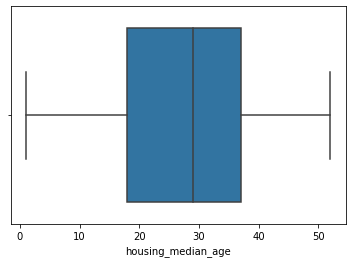

total_rooms


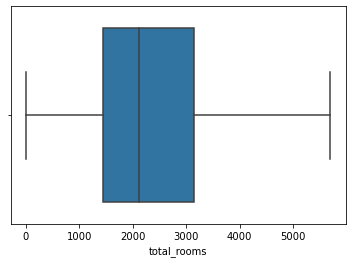

total_bedrooms


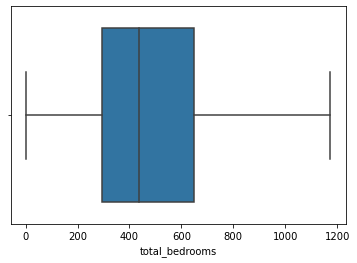

population


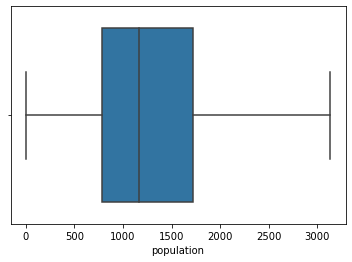

households


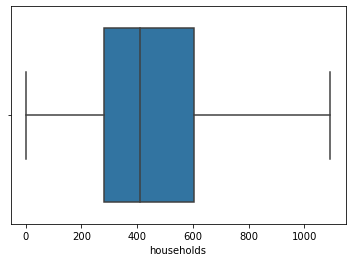

median_income


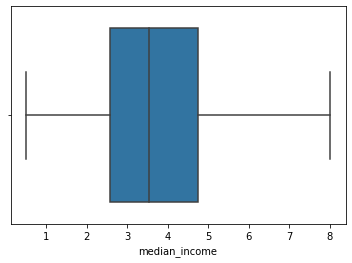

median_house_value


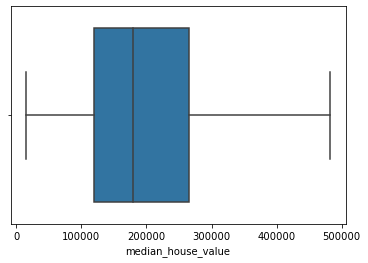

In [8]:
#BELOW CODE NOT PERFORMED

#For the Data not done outlier treatment, i wanted to go with raw data. Below is the code for outlier treatment\
#but it is not run for programming. Below is the code just i pointed out the outliers and treatment.

# Plotting Boxplot to see outliners

for i in df.columns:
    if i == 'ocean_proximity':
        continue
    print(i)
    sns.boxplot(df[i])
    plt.show()
    
#Outlier Treatment

def fn(data, cols):
    for col in cols:
        if data[col].dtype != object:
            q1,q3 = data[col].quantile([0.25,0.75])
            iqr = q3-q1
            upper = q3+(1.5*iqr)
            lower = q1-(1.5*iqr)
        
            data[col] = np.where(data[col]>upper,upper,data[col])
            data[col] = np.where(data[col]<lower,lower,data[col]) 
    return data

df2 = df

df2 = fn(df2, df2.columns)

print(df2)

#Plotting Boxplot to see outliners is corrected.

for i in df2.columns:
    if i == 'ocean_proximity':
        continue
    print(i)
    sns.boxplot(df2[i])
    plt.show()

#### 2. Handle missing values :

    Fill the missing values with the mean of the respective column.

In [9]:
df.isnull().sum()

df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [10]:
df_x.isnull().sum() #we observed that there is 207 missing values in total_bedrooms column, it need to treat now.

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [11]:
#Treating missing values with mean value

value = int(df_x['total_bedrooms'].mean())

df_x['total_bedrooms'].fillna(value, inplace = True)

df_x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [12]:
df_x.isnull().sum() #now there is no null values in x

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [13]:
df_y.isnull().sum() #zero null values in y 

0

#### 3. Encode categorical data :

    Convert categorical column in the dataset to numerical data.

In [14]:
df_x.head()

#Here ocean_proximity is the categorical column. It need to convert into numberical data using Encoding.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [15]:
df_x['ocean_proximity'].unique()  #we see 5 types of categories in ocean_proximity

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [16]:
label_encoder = preprocessing.LabelEncoder()  #took from sklearn library

df_x['ocean_proximity'] = label_encoder.fit_transform(df_x['ocean_proximity'])

df_x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3


In [17]:
df_x['ocean_proximity'].unique()

#converted categorical column into numercial data

array([3, 0, 1, 4, 2])

#### 4. Split the dataset : 

    Split the data into 80% training dataset and 20% test dataset.

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(df_x,df_y,test_size = 0.2)

In [19]:
df_x.shape, df_y.shape #100% data

((20640, 9), (20640,))

In [20]:
xtrain.shape, ytrain.shape #80% train data

((16512, 9), (16512,))

In [21]:
xtest.shape, ytest.shape #20% test data

((4128, 9), (4128,))

#### 5. Standardize data :

    Standardize training and test datasets.

In [22]:
df_x.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.861822,1425.476744,499.539680,3.870671,1.165843
std,2.003532,2.135952,12.585558,2181.615252,419.266601,1132.462122,382.329753,1.899822,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000


In [23]:
df_x2 = np.log(df_x)

df_x2.describe()

#Here we can observed after standardizing the data of data set df_x we see nan values in longitutue and ocean_proximity\
#this is because of very less values to log scale in longitude column and ocean_proximity column had encoded which\
#reflects low values like 0,1,2,3. This values showns the nan and -inf in the ocean_proximity column

#Here I need to perform log value to the feature variables (xtrain, xtest) by droping the longtitude and ocean_proximity column\
#Actually longitude and latitude columns will has not have much drastic value change.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,0.0,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04
mean,NaN,3.571471,3.225135,7.628577,6.053419,7.024116,5.980806,1.244465,-inf
std,NaN,0.059253,0.567748,0.751536,0.729477,0.738524,0.733071,0.470653,NaN
min,NaN,3.482470,0.000000,0.693147,0.000000,1.098612,0.000000,-0.693347,-inf
25%,NaN,3.524300,2.890372,7.277766,5.693732,6.668228,5.634790,0.941334,NaN
50%,NaN,3.533978,3.367296,7.662468,6.082219,7.061334,6.013715,1.262657,0.000000e+00
75%,NaN,3.629925,3.610918,8.054523,6.466533,7.452982,6.405228,1.556723,0.000000e+00
max,NaN,3.736478,3.951244,10.579489,8.771060,10.482402,8.713089,2.708057,1.386294e+00


In [24]:
col = xtrain.drop(['longitude','ocean_proximity'], axis = 1).columns

for i in col:
    xtrain[i] = np.log(xtrain[i])
    xtest[i] = np.log(xtest[i])    

In [25]:
xtrain.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.574763,3.571676,3.223438,7.628657,6.053417,7.024660,5.981160,1.245288,1.164365
std,1.999596,0.059313,0.568936,0.750552,0.726341,0.735816,0.729569,0.469985,1.416864
min,-124.350000,3.482470,0.000000,0.693147,0.693147,1.098612,0.693147,-0.693347,0.000000
25%,-121.790000,3.524594,2.890372,7.280525,5.697093,6.670766,5.638355,0.942494,0.000000
50%,-118.500000,3.533978,3.367296,7.662703,6.082219,7.060476,6.013715,1.263830,1.000000
75%,-118.010000,3.630190,3.610918,8.051102,6.464588,7.452982,6.401917,1.556586,1.000000
max,-114.470000,3.736478,3.951244,10.579489,8.771060,10.259972,8.713089,2.708057,4.000000


In [26]:
xtest.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-119.549472,3.570653,3.231920,7.628258,6.053428,7.021937,5.979388,1.241173,1.171754
std,2.019315,0.059010,0.562985,0.755551,0.741980,0.749345,0.747000,0.473358,1.435912
min,-124.300000,3.483085,0.693147,2.079442,0.000000,1.609438,0.000000,-0.693347,0.000000
25%,-121.810000,3.524005,2.890372,7.267351,5.676754,6.658973,5.616771,0.935985,0.000000
50%,-118.475000,3.533687,3.367296,7.658935,6.081076,7.067746,6.016157,1.258347,1.000000
75%,-117.990000,3.629129,3.610918,8.064794,6.473891,7.453127,6.410586,1.556881,1.000000
max,-114.310000,3.734331,3.951244,10.543682,8.607217,10.482402,8.554296,2.708057,4.000000


In [27]:
#Now the data has standardized 
#Not performed for data sets ytrain and ytest since it is dependent feature/varibles

#### 6. Perform Linear Regression : 

    Perform Linear Regression on training data.
    Predict output for test dataset using the fitted model.
    Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]

In [28]:
lr = LinearRegression()

lr.fit(xtrain,ytrain)

LinearRegression()

In [29]:
pred_xtrain = lr.predict(xtrain)

pred_xtest = lr.predict(xtest)

In [30]:
print('MSE for Train Data:', mean_squared_error(ytrain, pred_xtrain))

print('MSE for Test Data:', mean_squared_error(ytest, pred_xtest))

print('MAE for Train Data:', mean_absolute_error(ytrain, pred_xtrain)) #mean absolute error for train data

print('MAE for Test Data:', mean_absolute_error(ytest, pred_xtest)) #mean absolute error for test data

#Observations:
#for the model, MSE and MAE is very high values. Hence i just wanted to take data with 70 and 30 % to see if any changes.

MSE for Train Data: 5325174844.5893135
MSE for Test Data: 5188799088.535319
MAE for Train Data: 54988.863948232494
MAE for Test Data: 54147.73816737577


In [31]:
#Below is the code for Training data is 70 % and Testing data is 30 % ratio.

xtrain2, xtest2, ytrain2, ytest2 = train_test_split(df_x,df_y,test_size = 0.3)

xtrain2.shape, ytrain2.shape #70% train data

xtest2.shape, ytest2.shape #30% test data

col = xtrain2.drop(['longitude','ocean_proximity'], axis = 1).columns

for i in col:
    xtrain2[i] = np.log(xtrain2[i])
    xtest2[i] = np.log(xtest2[i])
    

lr.fit(xtrain2,ytrain2)

pred_xtrain2 = lr.predict(xtrain2)

pred_xtest2 = lr.predict(xtest2)

print('MSE for Train Data:', mean_squared_error(ytrain2, pred_xtrain2)) #mean squared error for train data

print('MSE for Test Data:', mean_squared_error(ytest2, pred_xtest2)) #mean squared error for test data

print('MAE for Train Data:', mean_absolute_error(ytrain2, pred_xtrain2)) #mean absolute error for train data

print('MAE for Test Data:', mean_absolute_error(ytest2, pred_xtest2)) #mean absolute error for test data

MSE for Train Data: 5375898530.538556
MSE for Test Data: 5119124900.880758
MAE for Train Data: 55136.03809270871
MAE for Test Data: 53970.58890365353


In [32]:
#Observations:
#Even after performing 70:30 ratio, No changes.
#Hence concluding the Linear Regression model with MSE for Train data = 5333939034.923431 and 
#MSE for Test data = 5151234480.939996

In [33]:
#Table for train data with predictions and differences

a = pd.DataFrame(ytrain)

a['pred_median_house_value'] = pred_xtrain

a['difference'] = a['pred_median_house_value']-a['median_house_value']

a.head()

#Table shows the acutal house values, prediction house values and difference

,median_house_value,pred_median_house_value,difference
18348,500001,388392.196109,-111608.803891
14118,132600,250288.164005,117688.164005
15341,152100,213081.994320,60981.994320
5687,394100,313495.255768,-80604.744232
9381,500001,435092.116115,-64908.883885


In [34]:
#Table for test data with predictions and differences

b = pd.DataFrame(ytest)

b['pred_median_house_value'] = pred_xtest

b['difference'] = b['pred_median_house_value']-b['median_house_value']

b.head()

#Table shows the acutal house values, prediction house values and difference

,median_house_value,pred_median_house_value,difference
11690,165600,185581.597735,19981.597735
10339,388700,295283.169302,-93416.830698
8486,155100,198193.547106,43093.547106
7260,148800,164319.332303,15519.332303
6286,178100,231450.816042,53350.816042


#### 7. Bonus exercise: Perform Linear Regression with one independent variable :

    Extract just the median_income column from the independent variables (from X_train and X_test).
    Perform Linear Regression to predict housing values based on median_income.
    Predict output for test dataset using the fitted model.
    Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [35]:
xtrain.shape, xtest.shape

((16512, 9), (4128, 9))

In [36]:
xtrain_Bo = pd.DataFrame(xtrain['median_income'])

xtrain_Bo.head()

,median_income
18348,2.349087
14118,1.357483
15341,1.468519
5687,1.966595
9381,2.448467


In [37]:
xtest_Bo = pd.DataFrame(xtest['median_income'])

xtest_Bo.head()

,median_income
11690,1.081805
10339,2.180078
8486,1.103500
7260,0.969414
6286,1.586251


In [38]:
xtrain_Bo.shape, xtest_Bo.shape

((16512, 1), (4128, 1))

In [39]:
lr.fit(xtrain_Bo,ytrain)

LinearRegression()

In [40]:
pred_xtrain_Bo = lr.predict(xtrain_Bo)

pred_xtest_Bo = lr.predict(xtest_Bo)

In [41]:
#Table for train data with predictions and differences

a = pd.DataFrame(ytrain)

a['pred_median_house_value'] = pred_xtrain_Bo

a['difference'] = a['pred_median_house_value']-a['median_house_value']

a.head()

#Table shows the acutal house values, prediction house values and difference

,median_house_value,pred_median_house_value,difference
18348,500001,383729.767456,-116271.232544
14118,132600,224941.492030,92341.492030
15341,152100,242722.001922,90622.001922
5687,394100,322480.220016,-71619.779984
9381,500001,399643.841307,-100357.158693


In [42]:
#Table for test data with predictions and differences

b = pd.DataFrame(ytest)

b['pred_median_house_value'] = pred_xtest_Bo

b['difference'] = b['pred_median_house_value']-b['median_house_value']

b.head()

#Table shows the acutal house values, prediction house values and difference

,median_house_value,pred_median_house_value,difference
11690,165600,180796.382638,15196.382638
10339,388700,356665.960650,-32034.039350
8486,155100,184270.488287,29170.488287
7260,148800,162798.925133,13998.925133
6286,178100,261574.735784,83474.735784


Text(0, 0.5, 'Predicted')

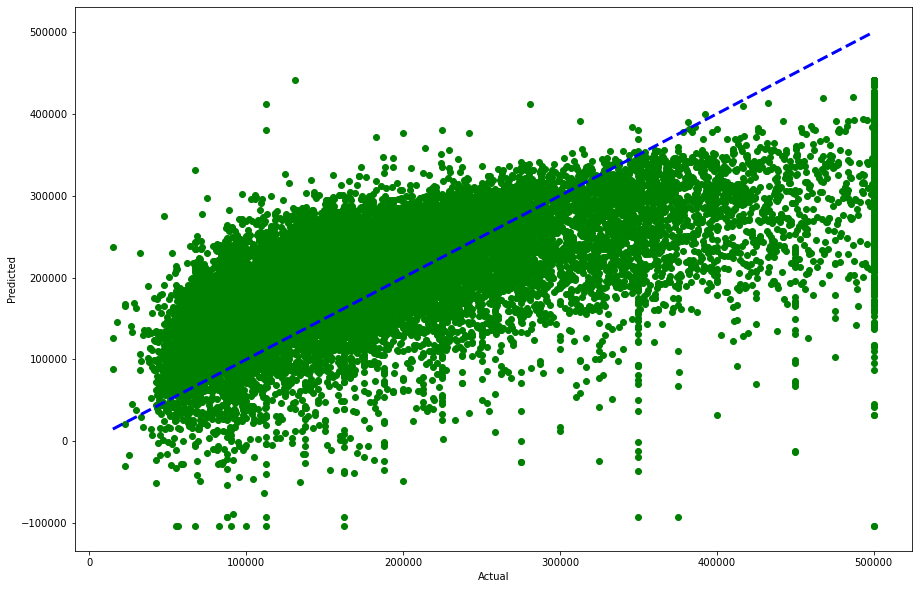

In [43]:
#scatter plot for train data

plt.figure(figsize=(15,10))
plt.scatter(ytrain,pred_xtrain_Bo,c = 'green')
plt.plot([ytrain.min(),ytrain.max()],[ytrain.min(),ytrain.max()], 'k--', c = 'blue', lw = 3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

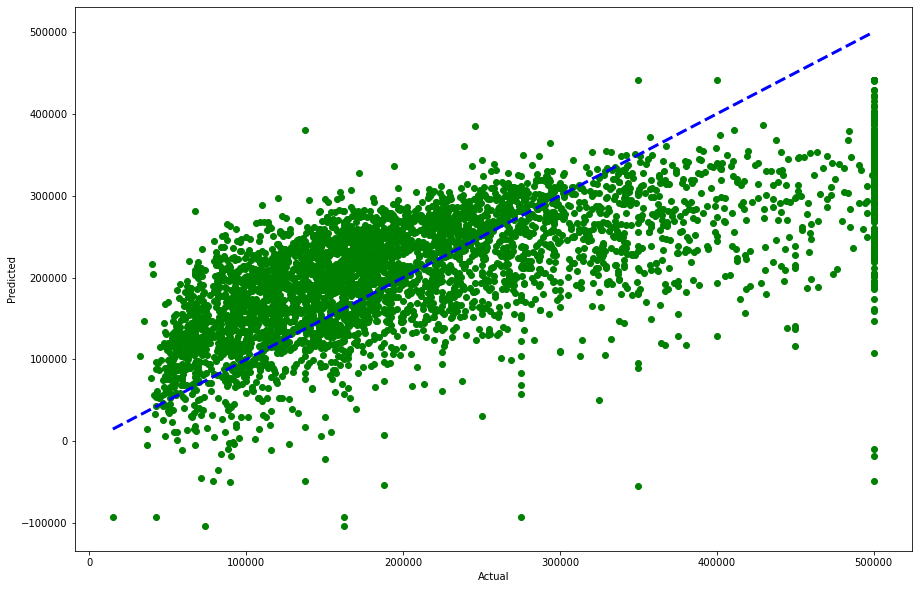

In [44]:
#scatter plot for test data

plt.figure(figsize=(15,10))
plt.scatter(ytest,pred_xtest_Bo,c = 'green')
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()], 'k--', c = 'blue', lw = 3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# END